In [2]:
import sourmash
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [6]:
# read taxonomy into useful sourmash format
from sourmash.tax import tax_utils
taxdb = 'gtdb-rs207.taxonomy.csv'
tax_assign = tax_utils.MultiLineageDB.load([taxdb],
                                           keep_full_identifiers=False,
                                           keep_identifier_versions=False )

In [4]:
# read in signature info
siginfocsv = "gtdb-rs207.genomic.k31.describe.csv"
sigInf = pd.read_csv(siginfocsv)
sigInf['ident'] = sigInf['name'].str.split(' ', expand=True)[0]
sigInf.head()

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident
0,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,bce936040b05e58a53be0974cbdef152,31,DNA,0,1000,4575,42,1,GCF_000814905.1 Enterobacter sp. Bisph1 strain...,/dev/fd/63,CC0,4594,GCF_000814905.1
1,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c46c657d26265d4ccc87b66a343e44e,31,DNA,0,1000,2404,42,1,"GCA_007116955.1 Vibrio sp., ASM711695v1",/dev/fd/63,CC0,2436,GCA_007116955.1
2,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,eea831872487c41dfc2fb613f493ba35,31,DNA,0,1000,5828,42,1,GCF_017948435.1 Pseudomonas protegens strain=M...,/dev/fd/63,CC0,5847,GCF_017948435.1
3,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c125d78f91b38497285d44e1b1d5405,31,DNA,0,1000,3306,42,1,"GCA_017995835.1 Amaricoccus sp., ASM1799583v1",/dev/fd/63,CC0,3332,GCA_017995835.1
4,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,dfc179236087a1222dbe18a61483fa61,31,DNA,0,1000,6960,42,1,GCF_001981135.1 Burkholderia pseudomallei stra...,/dev/fd/63,CC0,6993,GCF_001981135.1


In [7]:
sigInf['lineage'] = sigInf['ident'].apply(lambda x: tax_utils.find_match_lineage(x, tax_assign))
sigInf.head()

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident,lineage
0,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,bce936040b05e58a53be0974cbdef152,31,DNA,0,1000,4575,42,1,GCF_000814905.1 Enterobacter sp. Bisph1 strain...,/dev/fd/63,CC0,4594,GCF_000814905.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
1,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c46c657d26265d4ccc87b66a343e44e,31,DNA,0,1000,2404,42,1,"GCA_007116955.1 Vibrio sp., ASM711695v1",/dev/fd/63,CC0,2436,GCA_007116955.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
2,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,eea831872487c41dfc2fb613f493ba35,31,DNA,0,1000,5828,42,1,GCF_017948435.1 Pseudomonas protegens strain=M...,/dev/fd/63,CC0,5847,GCF_017948435.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
3,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c125d78f91b38497285d44e1b1d5405,31,DNA,0,1000,3306,42,1,"GCA_017995835.1 Amaricoccus sp., ASM1799583v1",/dev/fd/63,CC0,3332,GCA_017995835.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
4,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,dfc179236087a1222dbe18a61483fa61,31,DNA,0,1000,6960,42,1,GCF_001981135.1 Burkholderia pseudomallei stra...,/dev/fd/63,CC0,6993,GCF_001981135.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."


In [ ]:
# match identifiers to lineage, add to dataframe

lineage = tax_utils.find_match_lineage(ident, tax_assign)

#row['lineage'] = tax_utils.find_match_lineage(ident, tax_assign)

sigInf['lineage'] = sigInf['ident'].apply(lambda x: tax_utils.find_match_lineage(x, tax_assign))

## First, pick the largest and smallest genomes/signatures

Text(0, 0.5, 'Frequency')

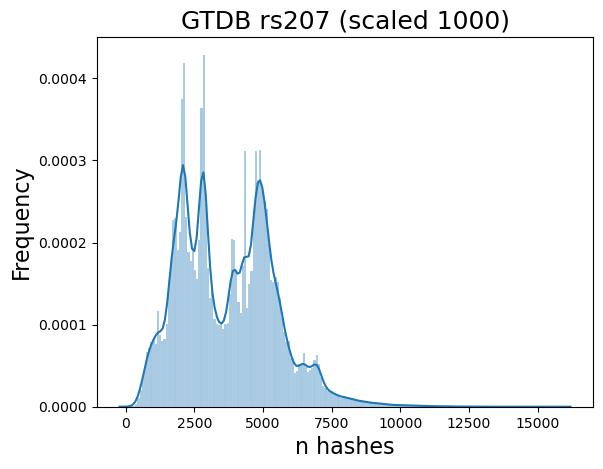

In [19]:
sns.histplot(sigInf['n_hashes'], kde=True, alpha=.4, stat="density", kde_kws=dict(cut=3), edgecolor=(1, 1, 1, .4))
plt.title('GTDB rs207 (scaled 1000)', fontsize=18)
plt.xlabel('n hashes', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [20]:
# largest 100, smallest 100
sigInf.nlargest(2, 'n_hashes')

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident,lineage
105137,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,6414370e8735a86a076021b0e5306e18,31,DNA,0,1000,15788,42,1,GCF_001931535.1 Minicystis rosea strain=DSM 24...,/dev/fd/63,CC0,15922,GCF_001931535.1,"((superkingdom, d__Bacteria), (phylum, p__Myxo..."
78781,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,e2761b9d0eb85c2a0b5b0c3dddcbe7e0,31,DNA,0,1000,14502,42,1,"GCA_018666605.1 Lentisphaerae bacterium, ASM18...",/dev/fd/63,CC0,14569,GCA_018666605.1,"((superkingdom, d__Bacteria), (phylum, p__Verr..."


In [21]:
sigInf.nsmallest(2, 'n_hashes')

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident,lineage
295865,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,765c74fa25d2e79dd35de2d49f2291e5,31,DNA,0,1000,187,42,1,GCF_002682985.1 Candidatus Tremblaya phenacola...,/dev/fd/63,CC0,206,GCF_002682985.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
305394,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,279a608b9cc0d67cc56979f49fd57123,31,DNA,0,1000,188,42,1,GCA_000147015.1 Candidatus Zinderia insecticol...,/dev/fd/63,CC0,188,GCA_000147015.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."


In [28]:
# create comparison csv for largest x smallest signatures
# start with 10 x 10
largest = sigInf.nlargest(10, 'n_hashes')['ident'].tolist()
smallest = sigInf.nsmallest(10, 'n_hashes')['ident'].tolist()
print(largest)

['GCF_001931535.1', 'GCA_018666605.1', 'GCF_000418325.1', 'GCA_018694235.1', 'GCF_005893125.1', 'GCF_004135755.1', 'GCF_002950945.1', 'GCA_018676675.1', 'GCF_016863635.1', 'GCF_003044305.1']


In [29]:
# get all comparisons between these lists
size_comp = list(product(largest, smallest))
print(len(size_comp))

100


In [30]:
size_comp[:5]

[('GCF_001931535.1', 'GCF_002682985.1'),
 ('GCF_001931535.1', 'GCA_000147015.1'),
 ('GCF_001931535.1', 'GCF_004296495.1'),
 ('GCF_001931535.1', 'GCF_017656055.1'),
 ('GCF_001931535.1', 'GCA_015134435.1')]

In [31]:
scD = pd.DataFrame(size_comp, columns =['identA', 'identB'])
scD['comparison_reason'] = "size-diff"
scD.head()

,identA,identB,comparison_reason
0,GCF_001931535.1,GCF_002682985.1,size-diff
1,GCF_001931535.1,GCA_000147015.1,size-diff
2,GCF_001931535.1,GCF_004296495.1,size-diff
3,GCF_001931535.1,GCF_017656055.1,size-diff
4,GCF_001931535.1,GCA_015134435.1,size-diff


In [32]:
scD.to_csv('gtdb-comparisons.largest-size-diff.n10.csv', index=False)

In [ ]:
# now do 15 largest
largest = sigInf.nlargest(15, 'n_hashes')['ident'].tolist()
smallest = sigInf.nsmallest(15, 'n_hashes')['ident'].tolist()
print(largest)
scD = pd.DataFrame(size_comp, columns =['identA', 'identB'])
scD['comparison_reason'] = "size-diff"
scD.head()
scD.to_csv('gtdb-comparisons.largest-size-diff.n10.csv', index=False)

## Now, let's pick a taxonomy-informed set of genomes to compare

In [27]:
sigInf.head()

# hmm, there are a few ways we could do this. evolpaths was complicated to select...
# i dont really want to use the evolpath style though, just want to select genomes that are v. distant.
# since I actually have the data already, can I select the most distant genomes for comparison? 
#Or hmm.. 50 comparisons in each 10% range, 50-60%, 60-70%, 70-80%, 80-90%, 90-100% (or maybe split this last one in two, at 95%)
# kinda hard to describe how these datasets were chosen, i guess, since it's a bit circular.

#k31 approx thresholds
#50% cANI <- 1e-9
#60% cANI <- 2e-7
#70% cANI <- 2e-5
#75% cANI <- 0.0002
#80% cANI <- 0.001
#86% cANI <- 0.01
#92% cANI <- 0.1
#95% cANI <- 0.2
#97% cANI <- 0.4

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident,lineage
0,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,bce936040b05e58a53be0974cbdef152,31,DNA,0,1000,4575,42,1,GCF_000814905.1 Enterobacter sp. Bisph1 strain...,/dev/fd/63,CC0,4594,GCF_000814905.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
1,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c46c657d26265d4ccc87b66a343e44e,31,DNA,0,1000,2404,42,1,"GCA_007116955.1 Vibrio sp., ASM711695v1",/dev/fd/63,CC0,2436,GCA_007116955.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
2,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,eea831872487c41dfc2fb613f493ba35,31,DNA,0,1000,5828,42,1,GCF_017948435.1 Pseudomonas protegens strain=M...,/dev/fd/63,CC0,5847,GCF_017948435.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
3,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c125d78f91b38497285d44e1b1d5405,31,DNA,0,1000,3306,42,1,"GCA_017995835.1 Amaricoccus sp., ASM1799583v1",/dev/fd/63,CC0,3332,GCA_017995835.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
4,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,dfc179236087a1222dbe18a61483fa61,31,DNA,0,1000,6960,42,1,GCF_001981135.1 Burkholderia pseudomallei stra...,/dev/fd/63,CC0,6993,GCF_001981135.1,"((superkingdom, d__Bacteria), (phylum, p__Prot..."
